# ClusterAI 2020
# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521
# Clase 01: analisis exploratorio de datos con datos de Google Play
#### Elaborado por: Nicolás Aguirre

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
DRIVE_FOLDER = 'ClusterAI2020/'
CLASS_FOLDER = 'clase_01/'
DATA_PATH = "../data/clase_01/"
%cd {'/gdrive/My Drive/'+DRIVE_FOLDER+CLASS_FOLDER}

## Librerias

In [ ]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

# Dataset

El dataset  que usaremos se encuentra en:
  
https://www.kaggle.com/lava18/google-play-store-apps

Una vez descargado, indicamos la direccion del archivo descargado a la funcion "pd.read_csv()" para importarlo como un objeto Pandas DataFrame. Si el archivo se encuentra en la misma carpeta que la notebook, con indicarle el nombre es suficiente.

Ademas, usaremos la funcion "np.shape()" y y el metodo ".head()" para:

* Verificar que se haya cargado bien el dataset: En algunos casos, debido a un error en el formato del archivo ".csv", las columnas y/o registros se cargan incorrectamente. En estos casos "pd.read_csv()" no devuelve error pero lo notaremos cuando usemos la funcion ".head()".


* Tener la dimension del dataset: Cantidad de registros y cantidad de columnas.


* Tener una base de la cantidad original de registros. Para que a medida que vayamos aplicando distintos filtros que limpien nuestros datos tengamos una numero de referencia. Si aplicamos un filtro, y de repente perdemos el 90% de los datos, lo mas probable es que en algo nos hayamos equivocado.

In [ ]:
google_df = pd.read_csv('clusterai_2020_clase01_dset_googleplaystore.csv')

In [ ]:
filas = np.shape(google_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(google_df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}\r\n')

print('Output de ".head(5)": ')
google_df.head(5)

Filas: 10841
Columnas: 13

Output de ".head(5)": 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Columnas
Si queremos saber el nombre de las columas en una variable utilizamos el metodo *.columns()*.

Para guardarlo, simplemente lo asignamos a una variable.

In [ ]:
nombre_columnas = google_df.columns.values
nombre_columnas

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], dtype=object)

# Limpieza de Datos

En esta parte nos vamos a encargar de limpiar:

* Duplicados  --> [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)


* Simbolos --> [str.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html) and [str.extract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html)



* 'NaN' --> [.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)


#### Duplicados

In [ ]:
# Vamos a eliminar las de la columna 'App' los valores repetidos, conservando unicamente la primera ocurrencia.
google_df.drop_duplicates(subset='App', inplace=True, keep='first')

# Las columnas para quitar los duplicados se indican en el argumento 'subset'
# mientras que la primera ocurrencia se indica con el argumento 'keep'

# La opcion 'inplace' nos evitar tener asignar la salida a una variable.
# Directamente se guarda sobre 'google_df'. Equivale a:

#google_df = google_df.drop_duplicates(subset='App', keep='first')

#### Simbolos

Las columnas 'Installs', 'Size', 'Price' y 'Reviews' tienen informacion en la que estamos interesados.

El problema es que estan en formato texto (o *string*) y hay simbolos y valores que nos impiden manipularlos en formato numerico ( *int* o *float*)

In [ ]:
#Installs
q_installs = len(google_df['Installs'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {q_installs} tipos de valores en "Install"\r\n')
print("\n", google_df['Installs'].unique())

En total hay 22 tipos de valores en "Install"


 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


Podemos notar 2 simbolos de la cell anterior que debemos eliminar para poder usar el dato como numero y no como cadena de texto, y un valor "Free" en algun registro que esta mal cargado.

Primero vamos a quitar el "Free" y luego vamos a reemplazaar los simbolos "+" y ","

In [ ]:
# Eliminacion manual de valores que no deberiamos tener en columas
google_df = google_df[google_df['Installs'] != 'Free']

# Aqui lo que hicimos fue conservar unicamente los registros cuyos valores en la columa "Installs" sean distintos (=!) a 'Free'
filas = np.shape(google_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

Filas: 9659


In [ ]:
#Reemplaamos los caraccteres '+' y ','
google_df['Installs'] = google_df['Installs'].str.replace(',','')
google_df['Installs'] = google_df['Installs'].str.replace('+','')
google_df = google_df.astype({"Installs": int})

In [ ]:
q_installs = len(google_df['Installs'].unique())
print(f'En total hay {q_installs} labels de Install\r\n')
print("\n", google_df['Installs'].unique())

En total hay 20 labels de Install


 [     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


In [ ]:
#Size
q_size = len(google_df['Size'].unique()) # Cantidad de valores unicos en 'Size'
print(f'En total hay {q_size} tipos de valores en "Size"\r\n')
print("\n", google_df['Size'].unique())
filas = np.shape(google_df)[0]
print(f'Filas: {filas}')

En total hay 461 tipos de valores en "Size"


 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M'

En la columna "Size", tenemos problemas de unidades, en algunos casos tenemos el tamaño en Megabytes (M) y en otras en Kilobytes (k), y algunos valores con el texto "Varies with device".

Primero, vamos a reemplazar los valores 'Varies with device' por NaN's.
Luego, vamos a separar los numeros que esten en formato texto y los guardaremos en formato numerico.
Ademas, vamos a homogeneizar el tamaño a 'M'. Para eso, extraeremos y reemplazaremos los caracteres 'k' y 'M'. 


Finalmente, los NaN's correspondiente a los valores "Varies with device", reemplazarlos por la media de cada categoria, para eliminar la manor cantidad de registros. Esta ultima tambien es una solucion, asi que proponemos que tambien la prueben.

In [ ]:
#Dejamos el peso de las app en Mb y convertimos aquellas que esten en Kb.
google_df['Size'].replace('Varies with device', np.nan, inplace = True )

In [ ]:
#Eliminamos las letras k y M que estan al final de cada valor. #(1)

output = google_df.Size.replace(r'[kM]', '', regex=True).astype(float) # Valores enteros sin las letras k/M
print(output,'\r\n')
print(output.value_counts())

0         19.0
1         14.0
2          8.7
3         25.0
4          2.8
5          5.6
6         19.0
7         29.0
8         33.0
9          3.1
10        28.0
11        12.0
12        20.0
13        21.0
14        37.0
15         2.7
16         5.5
17        17.0
18        39.0
19        31.0
20        14.0
21        12.0
22         4.2
23         7.0
24        23.0
25         6.0
26        25.0
27         6.1
28         4.6
29         4.2
         ...  
10811      3.9
10812     13.0
10813      2.7
10814     31.0
10815      4.9
10816      6.8
10817      8.0
10818      1.5
10819      3.6
10820      8.6
10821      2.5
10822      3.1
10823      2.9
10824     82.0
10825      7.7
10826      NaN
10827     13.0
10828     13.0
10829      7.4
10830      2.3
10831      9.8
10832    582.0
10833    619.0
10834      2.6
10835      9.6
10836     53.0
10837      3.6
10838      9.5
10839      NaN
10840     19.0
Name: Size, Length: 9659, dtype: float64 

11.0     183
12.0     181
14.0     178
13.

In [ ]:
#Separamos los grupos K y M #(2)
output = google_df.Size.str.extract(r'([kM])', expand=False)
print(output,'\r\n')
print(output.value_counts())

0          M
1          M
2          M
3          M
4          M
5          M
6          M
7          M
8          M
9          M
10         M
11         M
12         M
13         M
14         M
15         M
16         M
17         M
18         M
19         M
20         M
21         M
22         M
23         M
24         M
25         M
26         M
27         M
28         M
29         M
        ... 
10811      M
10812      M
10813      M
10814      M
10815      M
10816      M
10817      M
10818      M
10819      M
10820      M
10821      M
10822      M
10823      M
10824      M
10825      M
10826    NaN
10827      M
10828      M
10829      M
10830      M
10831      M
10832      k
10833      k
10834      M
10835      M
10836      M
10837      M
10838      M
10839    NaN
10840      M
Name: Size, Length: 9659, dtype: object 

M    8118
k     314
Name: Size, dtype: int64


In [ ]:
#Los NaN los reemplazamos por 1 para no perder registros #(3)
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)
print(output,'\r\n')
print(output.value_counts())

0        M
1        M
2        M
3        M
4        M
5        M
6        M
7        M
8        M
9        M
10       M
11       M
12       M
13       M
14       M
15       M
16       M
17       M
18       M
19       M
20       M
21       M
22       M
23       M
24       M
25       M
26       M
27       M
28       M
29       M
        ..
10811    M
10812    M
10813    M
10814    M
10815    M
10816    M
10817    M
10818    M
10819    M
10820    M
10821    M
10822    M
10823    M
10824    M
10825    M
10826    1
10827    M
10828    M
10829    M
10830    M
10831    M
10832    k
10833    k
10834    M
10835    M
10836    M
10837    M
10838    M
10839    1
10840    M
Name: Size, Length: 9659, dtype: object 

M    8118
1    1227
k     314
Name: Size, dtype: int64


In [ ]:
#Homogeneizamos las unidades, k = 10**-3 y M = 1 #(4)
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)\
.replace(['k','M'], [10**-3, 1]).astype(float)
#print(output,'\r\n')
print(output.value_counts())

1.000    9345
0.001     314
Name: Size, dtype: int64


In [ ]:
# Juntamos todo
google_df.Size = (google_df.Size.replace(r'[kM]', '', regex=True).astype(float) * \
             google_df.Size.str.extract(r'([KM])', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**-3, 1]).astype(float))

In [ ]:
google_df.Size

0         19.0
1         14.0
2          8.7
3         25.0
4          2.8
5          5.6
6         19.0
7         29.0
8         33.0
9          3.1
10        28.0
11        12.0
12        20.0
13        21.0
14        37.0
15         2.7
16         5.5
17        17.0
18        39.0
19        31.0
20        14.0
21        12.0
22         4.2
23         7.0
24        23.0
25         6.0
26        25.0
27         6.1
28         4.6
29         4.2
         ...  
10811      3.9
10812     13.0
10813      2.7
10814     31.0
10815      4.9
10816      6.8
10817      8.0
10818      1.5
10819      3.6
10820      8.6
10821      2.5
10822      3.1
10823      2.9
10824     82.0
10825      7.7
10826      NaN
10827     13.0
10828     13.0
10829      7.4
10830      2.3
10831      9.8
10832    582.0
10833    619.0
10834      2.6
10835      9.6
10836     53.0
10837      3.6
10838      9.5
10839      NaN
10840     19.0
Name: Size, Length: 9659, dtype: float64

In [ ]:
#Reemplazamos aquellos registros con 'Varies with device' (ahora NaN) con la media del peso segun la categoria
google_df['Size'].fillna(google_df.groupby('Genres')['Size'].transform('mean'), inplace = True)

In [ ]:
# A float
google_df['Size'] = google_df['Size'].astype(float)
google_df['Installs'] = google_df['Installs'].astype(float)

In [ ]:
#quitamos simbolo '$' y pasamos a float.
google_df['Price'] = google_df['Price'].str.replace('$','')
google_df['Price'] = google_df['Price'].astype(float)

In [ ]:
google_df['Reviews'] = google_df['Reviews'].astype(int)

**Links para curiosos**

Regular Expressions:
   - [Documentacion](https://docs.python.org/3/howto/regex.html) 
   - [YouTube](https://www.youtube.com/watch?v=8DvywoWv6fI&list=WL&index=2&t=21317s) 
   - [Ejemplos](https://www.geeksforgeeks.org/pattern-matching-python-regex/)

## NaN

Ahora verificamos que las columnas no tengan NaN.

En caso de haberlos, tendremos que decidir:

- si son suficientes como para eliminar TODA la columa y perder esa informacion, o

        
- decidir eliminar unicamente los registros.

In [ ]:
col_NaN = google_df.isnull().any()
print(col_NaN,'\r\n')

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool 



In [ ]:
# Cantidad de valores nulos ordenados descendentemente
total = google_df.isnull().sum().sort_values(ascending=False)
total

Rating            1463
Current Ver          8
Size                 3
Android Ver          2
Type                 1
Last Updated         0
Genres               0
Content Rating       0
Price                0
Installs             0
Reviews              0
Category             0
App                  0
dtype: int64

In [ ]:
# Cantidad de valores nulos ordenados descendentemente
total = google_df.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (google_df.isnull().sum()/google_df.isnull().count()).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151465
Current Ver,8,0.000828
Size,3,0.000311
Android Ver,2,0.000207
Type,1,0.000104
Last Updated,0,0.000000


In [ ]:
# Limpiamos registros '.dropna'
google_df.dropna(how ='any', inplace = True)

In [ ]:
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {google_df.shape[0]} filas x {google_df.shape[1]} columnas')

Nos quedamos con un dataframe de 8187 filas x 13 columnas


### Ahora que terminamos con la limpieza general del dataset, pasemos a analizar:
    
    - Rating
    
    - Categorias
    
    - Categorias vs Rating
    
    - Reviews
    
    - Precio

# Rating

A continuacion veamos la distribucion estimada del 'Rating' y su histograma

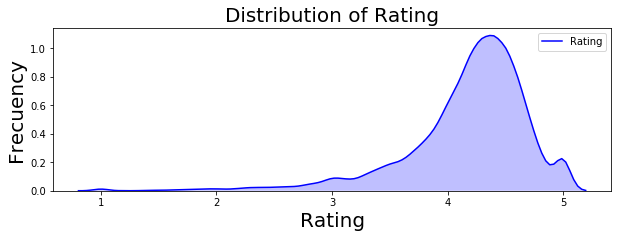

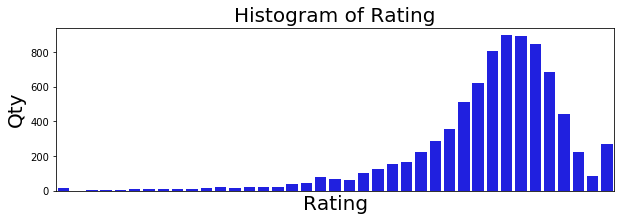

In [ ]:
plt.figure(figsize=(10,3))
sns.kdeplot(google_df['Rating'], color= "Blue", shade = True)
plt.xlabel("Rating",size = 20)
plt.ylabel("Frecuency",size = 20)
plt.title('Distribution of Rating',size = 20)
#plt.imsave('KDE',format='png') # Guardar la imagen
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(google_df.Rating, color="Blue")
plt.xlabel("Rating",size = 20)
plt.ylabel("Qty",size = 20)
plt.title('Histogram of Rating',size = 20)
plt.xticks([]) # por si deseamos eliminar los intervalos en el eje-x
#plt.imsave('Histogram',format='png') # Guardar la imagen
plt.show()

# Categorias

A modo de ejemplo, podriamos querer saber como es el comportamiento del Rating por Categoria:
    
* Vamos a visualizar el top 10 de categorias con mayor cantidad de apps.

* Boxplot de Categoria vs Rating

In [ ]:
# Gardamos en una variable la cantidad de categorias
q_categorias = len(google_df['Category'].unique())
print(f'En total hay {q_categorias} categorias\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", google_df['Category'].unique())

En total hay 33 categorias


 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


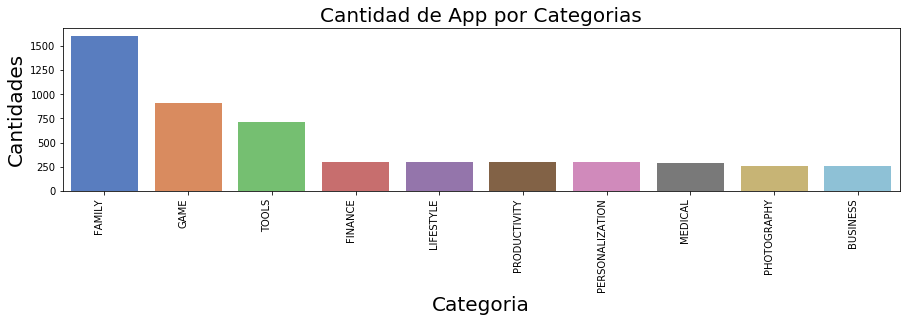

In [ ]:
# top
top_n = 10
# Guardamos los indices de los top_n categorias
idx_top = google_df['Category'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(x="Category", data=google_df,
                  order=idx_top,
                  palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de App por Categorias', size = 20)
plt.xlabel("Categoria", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

# Categoria vs Rating

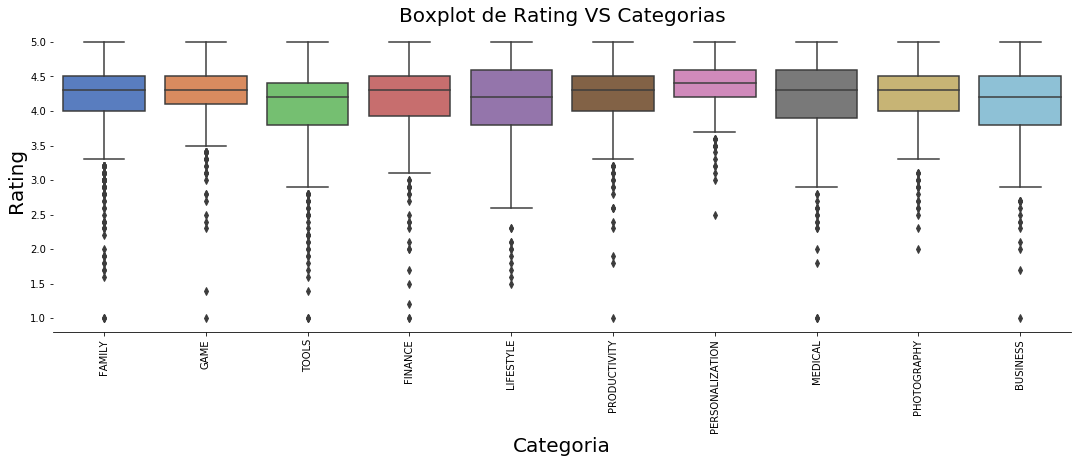

In [ ]:
# Todas las categorias
g = sns.catplot(x="Category",y="Rating",
                data=google_df, 
                kind="box",
                order=idx_top,
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Categoria",size = 20)
plt.ylabel("Rating",size = 20)
plt.title('Boxplot de Rating VS Categorias',size = 20)
plt.show()

## Mediana, Q1-Q3, whiskers y  outliers 
En muchas ocaciones, luego de ver los plots vamos a querer guardar en variables valores como la media, los valores atipicos y los "whiskers" para cada categoria.

A modo de ejemplo, veamos como obtenerlos para una unica categoria.

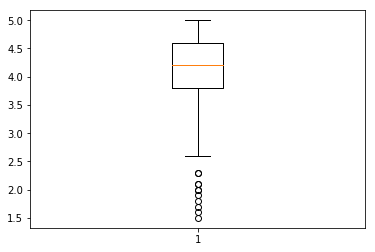

In [ ]:
cat_select = 'LIFESTYLE'
df_pivot = google_df[google_df['Category']==cat_select]
plt.figure()
bxplot = plt.boxplot(df_pivot['Rating'])
#bxplot = plt.boxplot(df_pivot['Rating'],whis=[15, 82])
plt.show()

In [ ]:
# Mediana
medians = bxplot["medians"][0].get_ydata()

# Marcas de Boxplot
low_limits = bxplot["whiskers"][0].get_ydata()
up_limits = bxplot["whiskers"][1].get_ydata()

# Valores Q1 - Q3
Q1 =  low_limits[0]
Q3 =  up_limits[0]

# whiskers: Valores extremos de las lineas que salen del intervalo [Q1-Q3]
low_whiskers =  low_limits[1]
up_whiskers = up_limits[1]

# Outliers = fliers: Valores mas alla de los whiskers 
outliers = bxplot["fliers"][0].get_ydata()

In [ ]:
print(f'Valor Mediana:\r\n {medians[0]}\r\n')
print(f'[Q1 - Q3] : [{Q1} - {Q3}]\r\n')
print(f'[Inferior  - Superior]: [{low_whiskers} - {up_whiskers}] \r\n')
print(f'Valores outliers:\r\n{outliers}\r\n')

Valor Mediana:
 4.2

[Q1 - Q3] : [3.8 - 4.6]

[Inferior  - Superior]: [2.6 - 5.0] 

Valores outliers:
[1.7 1.9 2.3 1.8 1.6 2.  2.  1.5 2.1 2.3 2.1]



# Reviews

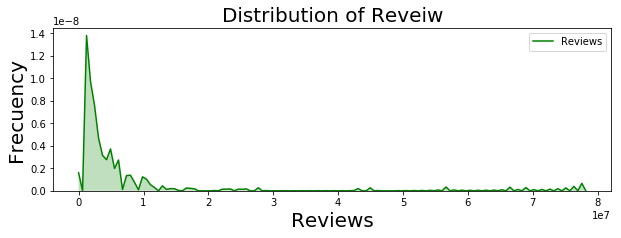

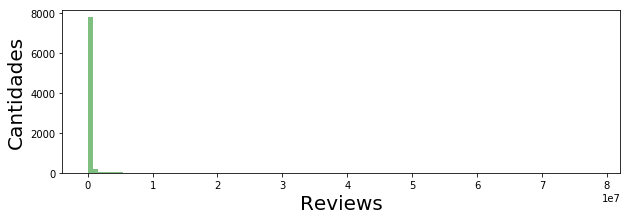

In [ ]:
# En este primer plot vamos a ver una estimacion de la distribucion de de los reviews de la cantidad de Reviews
plt.figure(figsize=(10,3))
g = sns.kdeplot(google_df.Reviews, color="Green", shade = True)
plt.xlabel("Reviews",size = 20)
plt.ylabel("Frecuency",size = 20)
plt.title('Distribution of Reveiw',size = 20)
plt.show()

# En este segundo plot vamos a ver el histograma de la cantidad de reviews.
# El parametro bins define la cantidad de sub-intervalos en los que vamos a dividir el eje-x
plt.figure(figsize=(10,3))
plt.hist(google_df['Reviews'], bins=100,color='g' ,alpha=0.5)
plt.xlabel("Reviews",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

Este ultimo grafico nos da alguna informacion?

Muchas veces los graficos parecen que no nos muestran nada.

En los casos donde tenemos muchas informacion concentrada, una buena practica es hacer un cambio de escala.

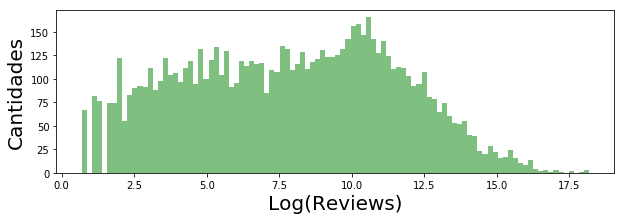

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(np.log(1+google_df.Reviews),bins=100, color='g' ,alpha=0.5)
plt.xlabel("Log(Reviews)",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

Ahora podemos ver mejor como se distribuyen las cantidades de reviews ...

Alla en el fondo, donde antes no veiamos nada, ahora podemos ver que hay un par de apps con muchisimos reviews...
veamos cuales son ...

In [ ]:
google_df[google_df.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,59.185124,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,59.185124,1.000000e+08,Free,0.0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


**Habra alguna relacion entre los "Reviews" y alguna otra variable?**

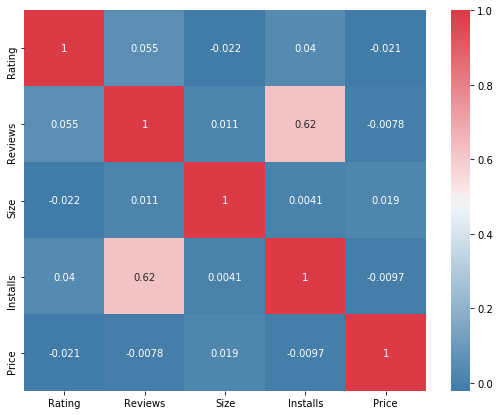

In [ ]:
corrmat = google_df.corr()

f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

**Tiene sentido?**

# Precio

Tenemos a nuestra disposicion tambien los precios de las Apps, asi que vamos a usarlos!

* Estadistica descriptiva que nos da [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) y si algo nos llama la atencion, explorarlo y si hace falta corregirlo.


* Vamos a armar a criterio nuestro categorias de precio de las apps.


* Crucemos informacion entre las categorias de precio Precio y Rating, y saquemos conclusiones.

In [ ]:
google_df['Price'].describe()

count    8187.000000
mean        1.038722
std        16.867118
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Hay una app que cuesta U$D 400 ! !

In [ ]:
google_df[google_df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


### Ahora armemos a nuestro gusto brands segun los precios y veamos como se distribuyen

In [ ]:
#Primero defininmos los limites de cada categoria y creemos la columna 'PriceBand'

google_df.loc[ google_df['Price'] == 0, 'PriceBand'] = '0 Free'
google_df.loc[(google_df['Price'] > 0) & (google_df['Price'] <= 0.99), 'PriceBand'] = '1 Muy Barato'
google_df.loc[(google_df['Price'] > 0.99) & (google_df['Price'] <= 2.99), 'PriceBand']   = '2 Barato'
google_df.loc[(google_df['Price'] > 2.99) & (google_df['Price'] <= 4.99), 'PriceBand']   = '3 Normal'
google_df.loc[(google_df['Price'] > 4.99) & (google_df['Price'] <= 14.99), 'PriceBand']   = '4 Caro'
google_df.loc[(google_df['Price'] > 14.99) & (google_df['Price'] <= 29.99), 'PriceBand']   = '5 Muy Caro'
google_df.loc[(google_df['Price'] > 29.99), 'PriceBand']  = '6 #VamoACalmarnos'

In [ ]:
#Veamos como es el mean value para las bandas que definimos
google_df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.166394
1,1 Muy Barato,4.300971
2,2 Barato,4.293220
3,3 Normal,4.237838
4,4 Caro,4.235897
5,5 Muy Caro,4.238889
6,6 #VamoACalmarnos,3.910526


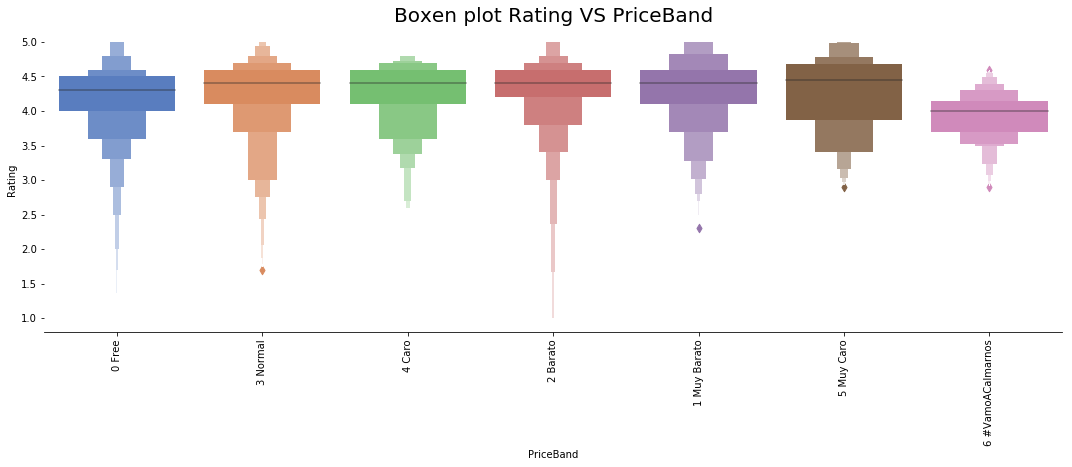

In [ ]:
# Ahora en vez de utilizar 'box'(boxplot)
# ingresaremos 'boxen' al argumento 'kind' de la funcion 'catplot'
g = sns.catplot(x="PriceBand", y="Rating",
                data=google_df, 
                kind="boxen", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)
plt.show()

Para bases de datos muy grandes, muchas veces los limites de confiabilidad del boxplot por defecto consideran erroneamente "outliers" a muestras con muy baja probabilidad, que si deberian considerarse como parte del espacio de muestra.

Ademas, el "boxplot" no deja visualizar como se distribuyen de muestras en los extremos.

Si creemos que alguno de estos factores, entre otros, nos puede estar sucediendo y nos esconde informacion que creemos relevante mostrar, lo mejor es probar con algun otro tipo de ploteo ([boxen](https://vita.had.co.nz/papers/letter-value-plot.pdf) o  "violin").

# Propuestas:
    
    - Apps Pagas vs Apps Free
    
    - Content Rating (Everyone, Teen, +18, etc)
         Hint: google_df['Genres'] = google_df['Genres'].str.split(';').str[0]
         
    - Genres vs Rating
    
    - Genres (Estadistica descriptiva w.r.t , i.e, "Rating")
    
    - Mismo analisis, pero en vez de reemplazar Varies with device por la media de w.r.t. categoria, eliminando los registros y ver si el supuesto que hicimos impacta en los resultados. 